# WE_with_DL results

In [9]:
import sys
import os

# To import lib from parent directory
current_dir = os.getcwd()
parent_dir = os.path.abspath( os.path.join(current_dir, "../") )
sys.path.append(parent_dir)

In [10]:
from lib import evaluate
import pandas as pd
import numpy as np

### Specify the result file

In [11]:
result_dir = os.path.join(current_dir, "WE_with_DL/result-20241130141307")

### Result

In [12]:
result = pd.read_csv(result_dir + "/result.csv")
print(result)

   fold       acc    tn    fp   fn    tp  sensitivity  specificity       mcc  \
0     1  0.632906  1275  1342  550  1987     0.783209     0.487199  0.282678   
1     2  0.648622  1512  1092  719  1831     0.718039     0.580645  0.301397   
2     3  0.663950  1740   828  904  1682     0.650425     0.677570  0.328104   
3     4  0.647584  1396  1187  629  1941     0.755253     0.540457  0.302725   
4     5  0.631671   974  1538  360  2281     0.863688     0.387739  0.286915   

        auc  
0  0.712469  
1  0.706779  
2  0.726298  
3  0.714990  
4  0.723276  


In [13]:
metrics = {
    "acc": "acc",
    "sn": "sensitivity",
    "sp": "specificity",
    "mcc": "mcc",
    "auc": "auc",
}

print("Performance average:")
for metric in metrics:
    print("%s\t: %.2f" % (metric, result[metrics[metric]].mean()))

Performance average:
acc	: 0.64
sn	: 0.75
sp	: 0.53
mcc	: 0.30
auc	: 0.72


### ROC Curve

In [23]:
raw_data = pd.read_csv(result_dir + "/raw.csv", header=None)

Convert to numpy

In [24]:
raw_data = raw_data.to_numpy()
print(raw_data.shape)

(10, 5156)


Get true answers and prediction results

In [25]:
answers = []
predictions = []

for i, data in enumerate(raw_data):
    if i % 2 == 0:
        answer = []
        for j in range(1, len(data)):
            if np.isnan(data[j]): # nan is the end of the sequence
                break
            answer.append(data[j])
        answers.append(answer)
    else:
        prediction = []
        for j in range(1, len(data)):
            if np.isnan(data[j]):
                break
            prediction.append(data[j])
        predictions.append(prediction)

print(len(answers), len(predictions))

5 5


Plot ROC curves

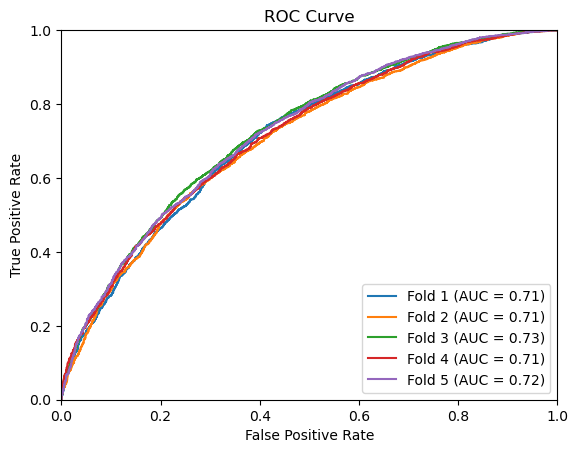

In [26]:
model_perform_dict = {
    "Fold 1": predictions[0],
    "Fold 2": predictions[1],
    "Fold 3": predictions[2],
    "Fold 4": predictions[3],
    "Fold 5": predictions[4],
}

evaluate.ROC_curve_of_cross_validation(answers, model_perform_dict)